In [131]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

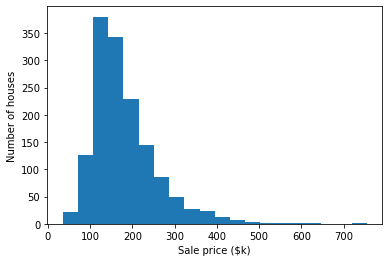

In [28]:
from matplotlib import pyplot as plt

plt.hist(train['SalePrice'], bins=20)
plt.xticks(range(0, 800000, 100000), range(0, 800, 100))
plt.xlabel('Sale price ($k)')
plt.ylabel('Number of houses')
plt.show()

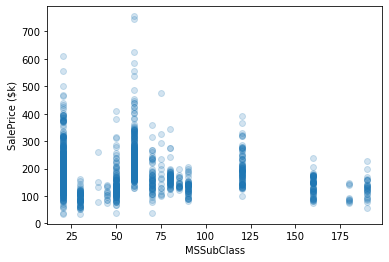

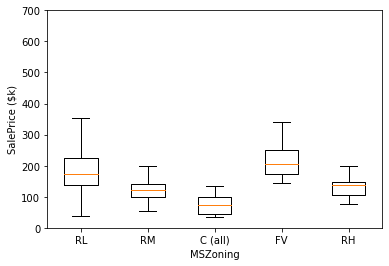

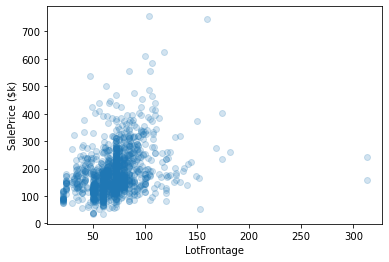

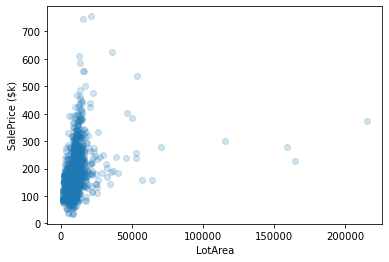

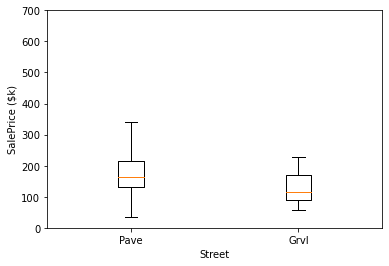

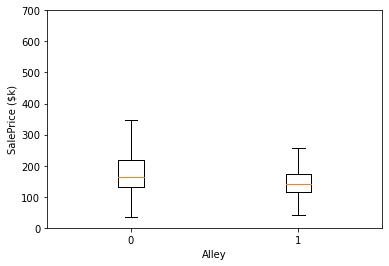

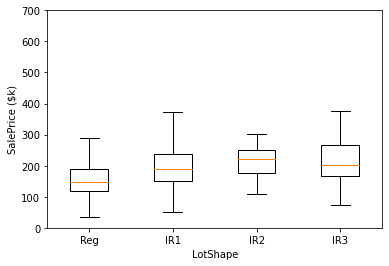

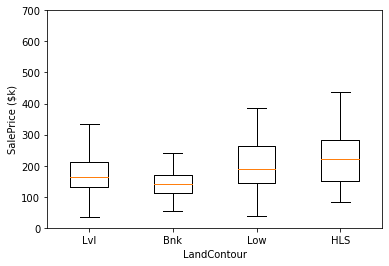

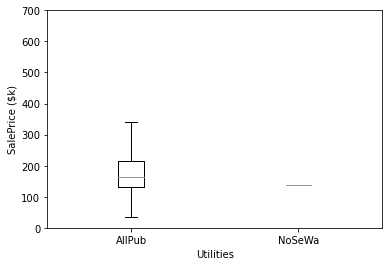

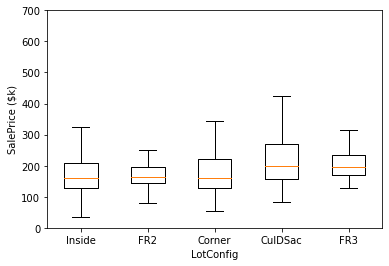

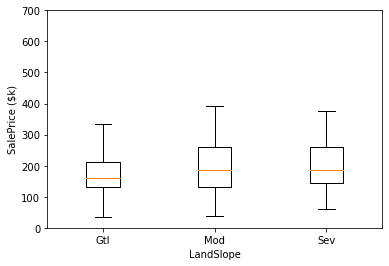

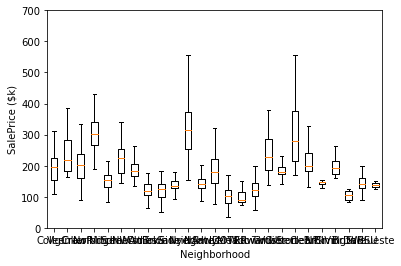

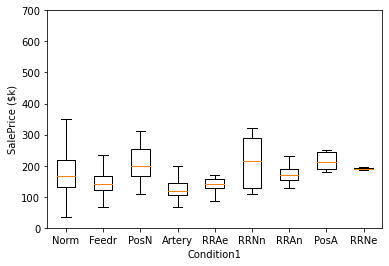

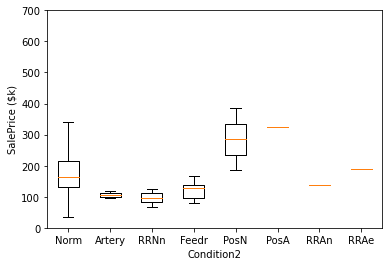

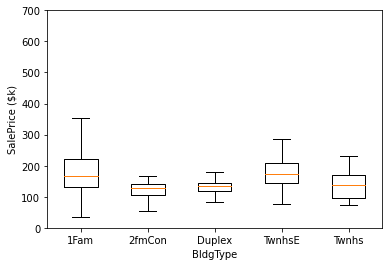

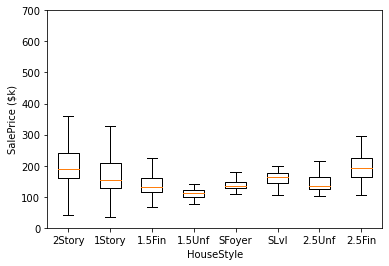

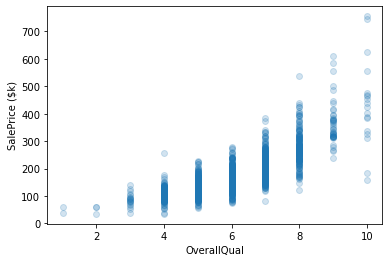

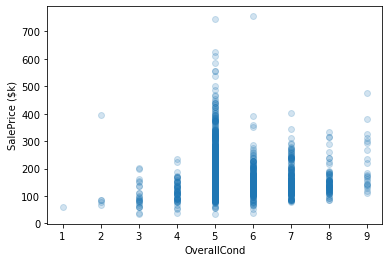

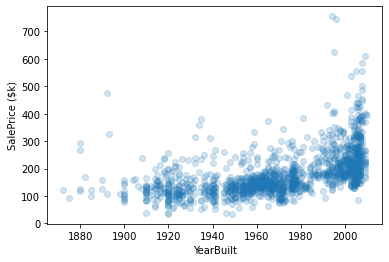

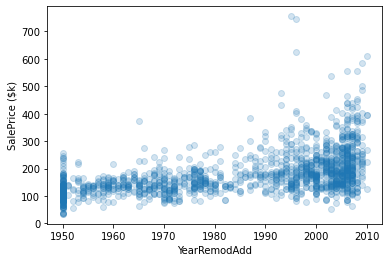

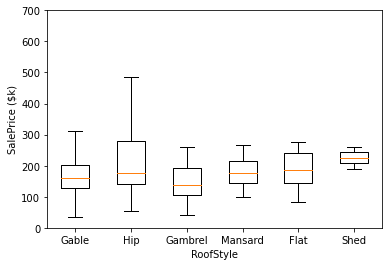

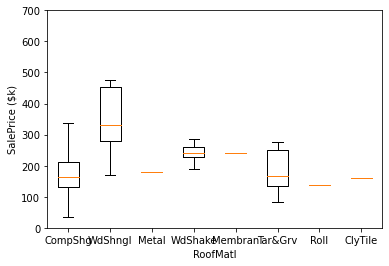

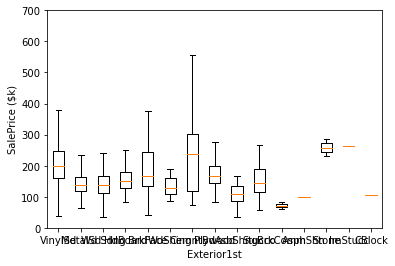

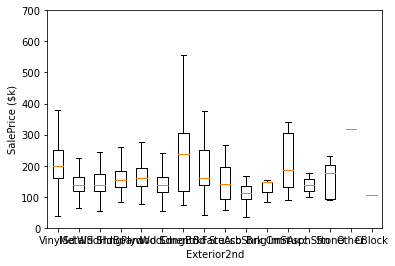

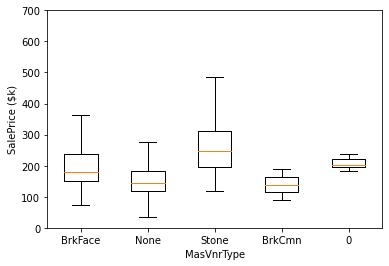

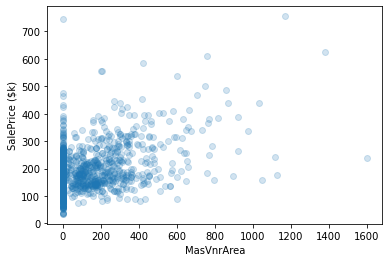

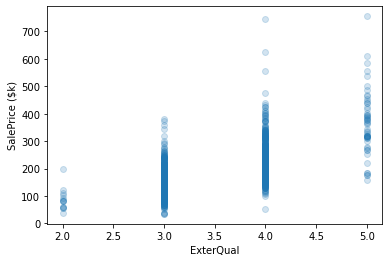

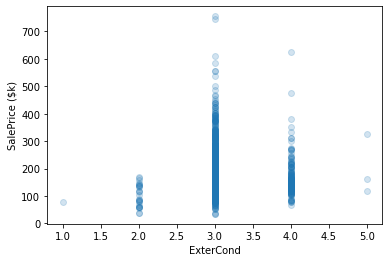

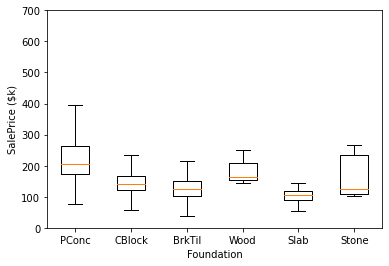

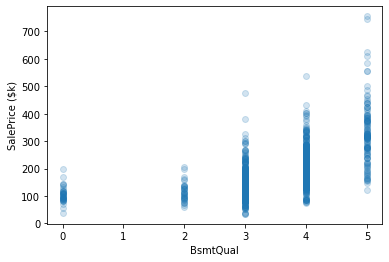

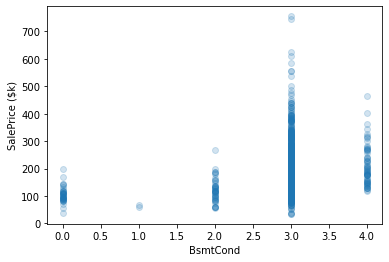

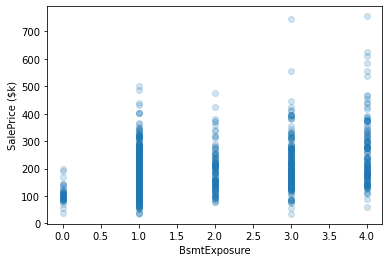

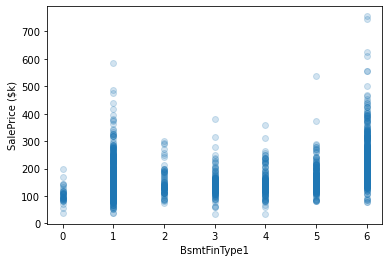

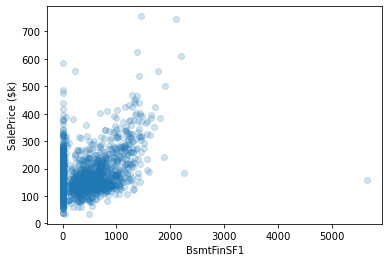

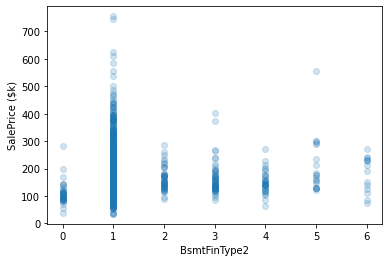

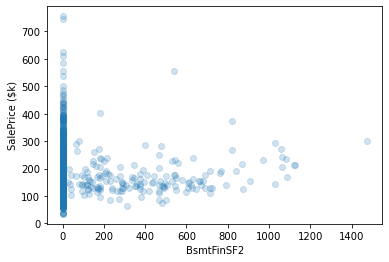

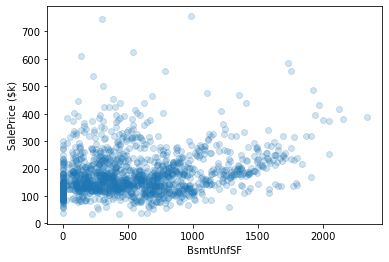

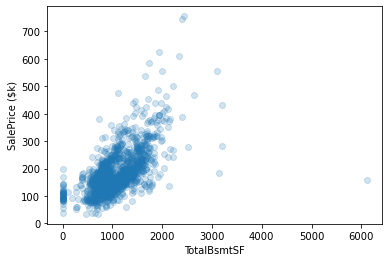

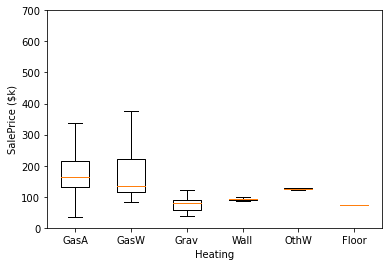

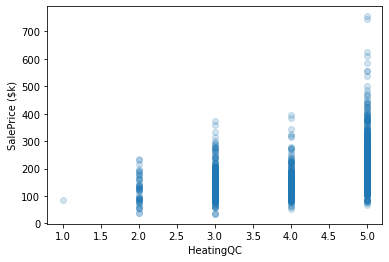

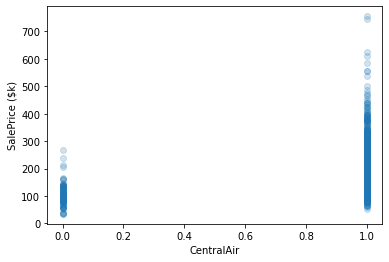

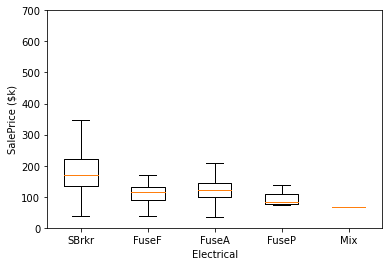

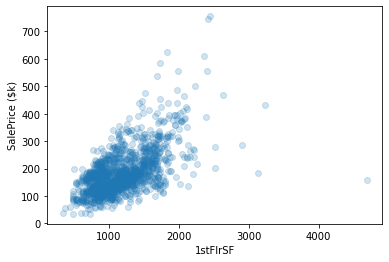

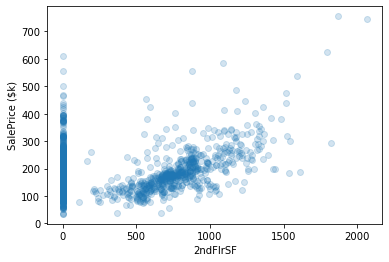

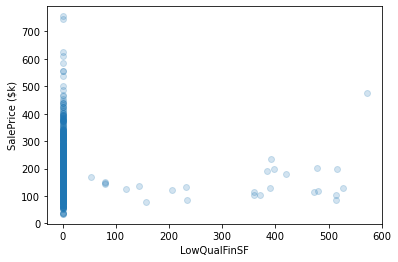

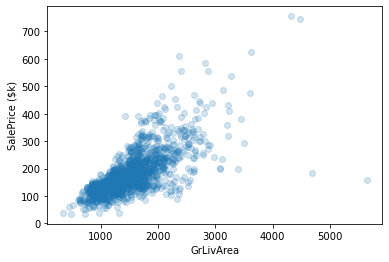

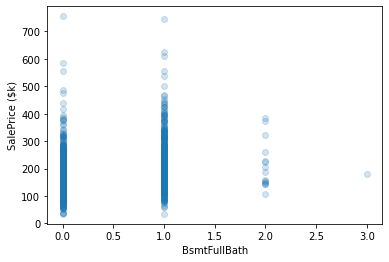

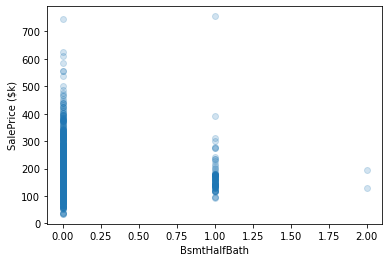

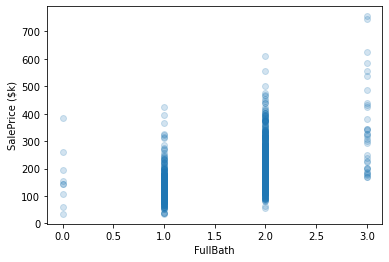

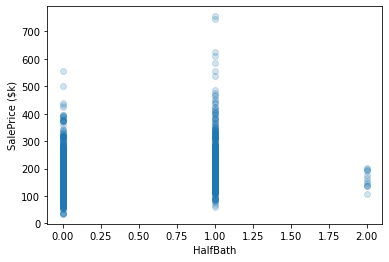

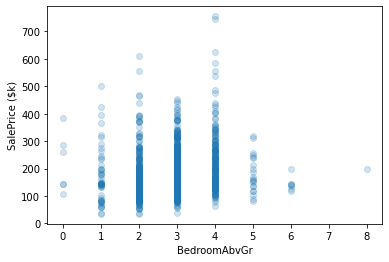

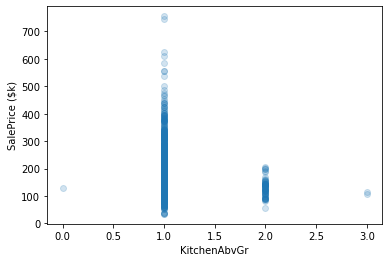

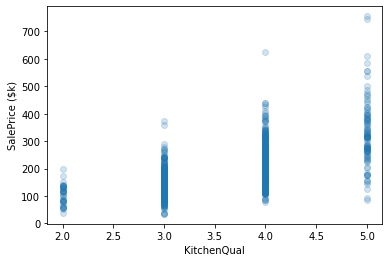

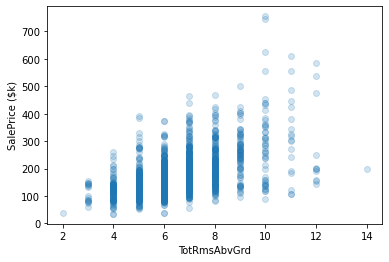

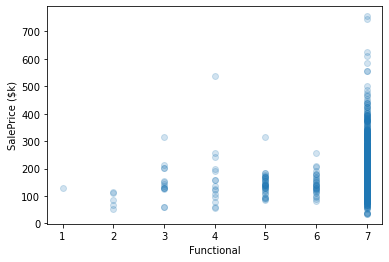

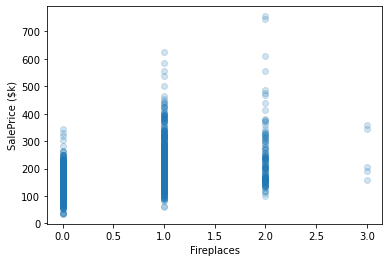

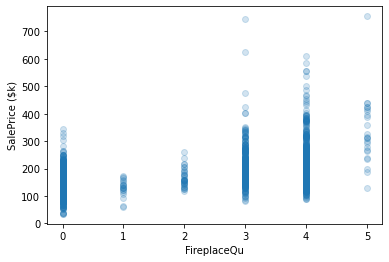

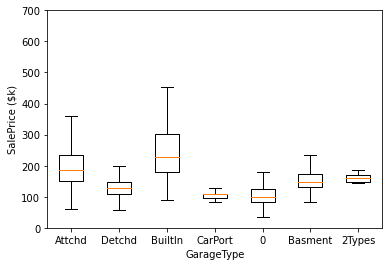

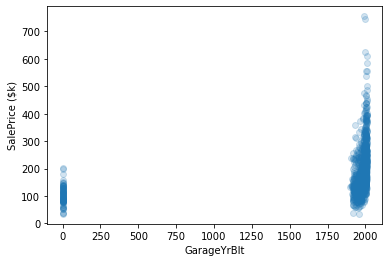

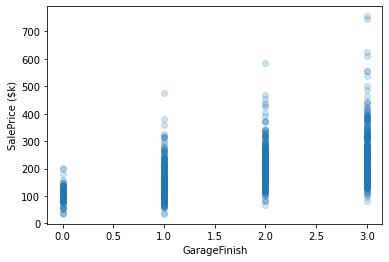

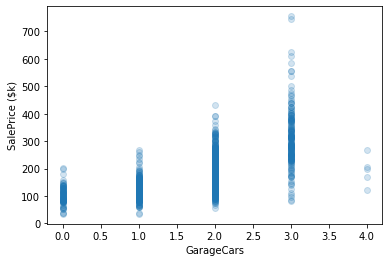

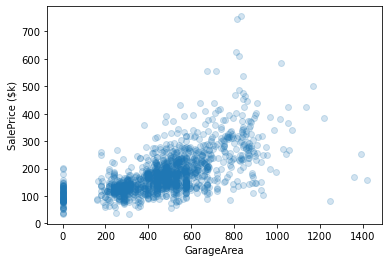

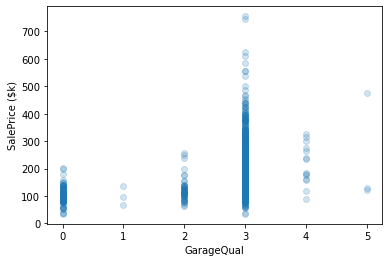

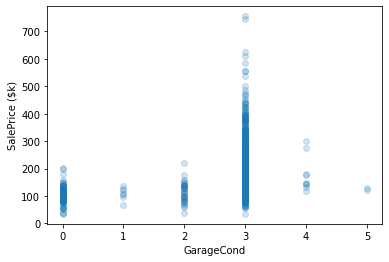

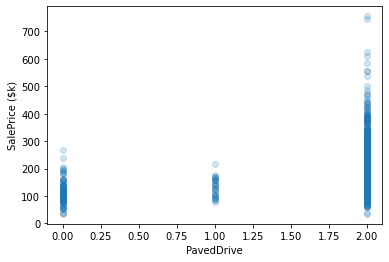

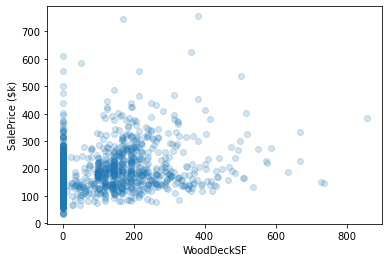

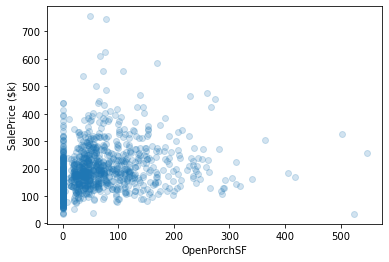

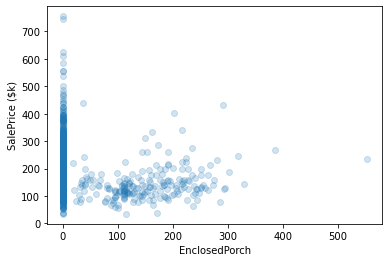

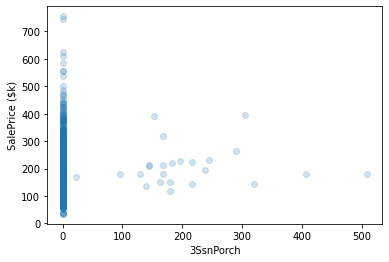

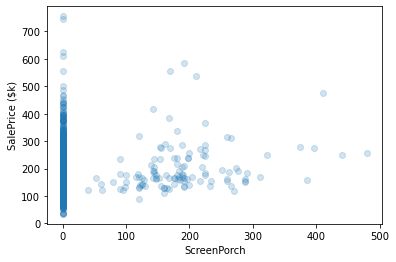

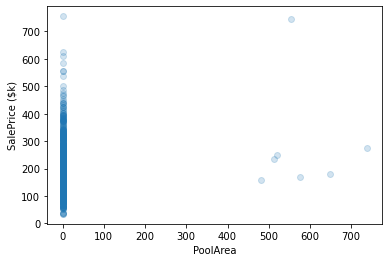

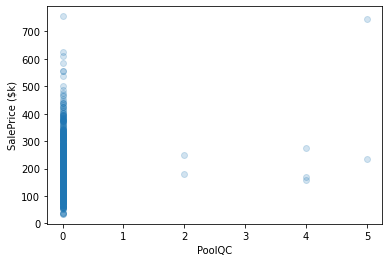

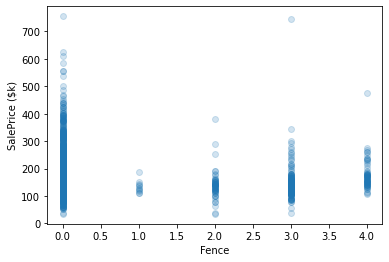

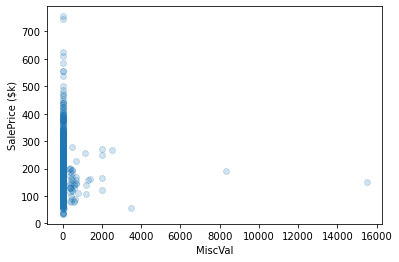

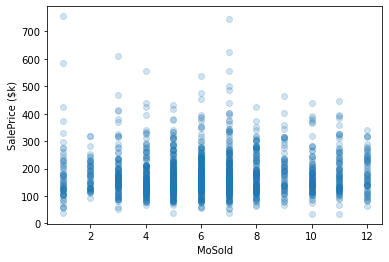

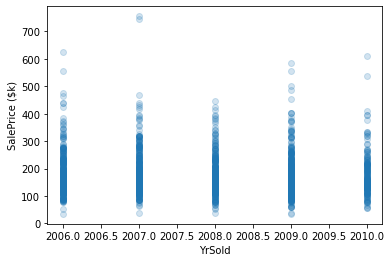

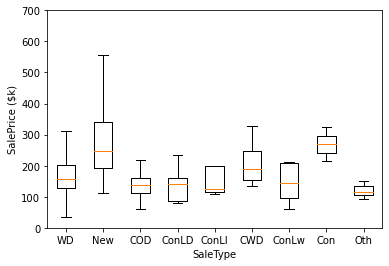

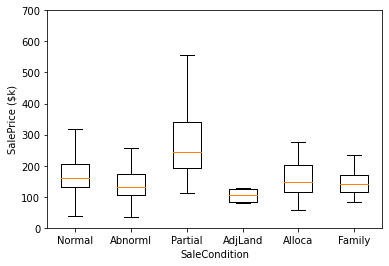

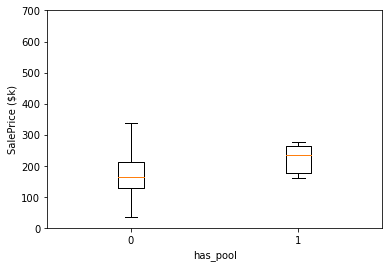

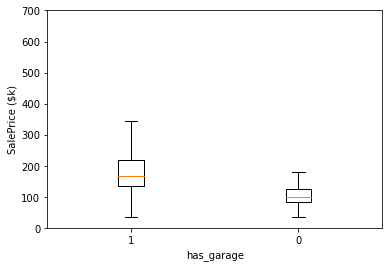

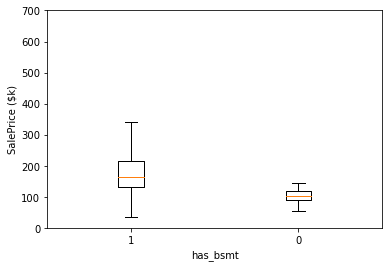

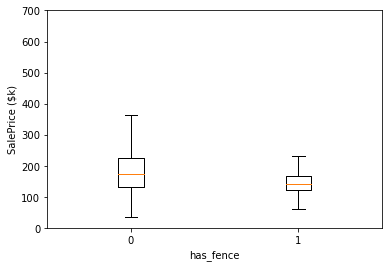

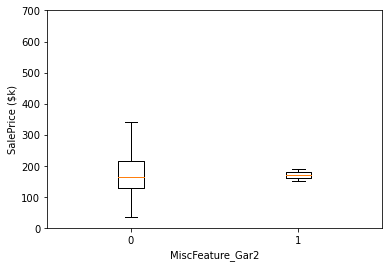

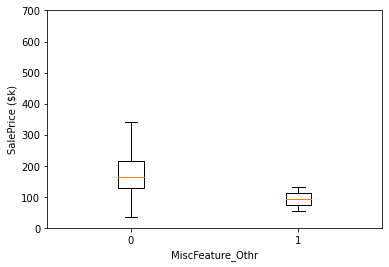

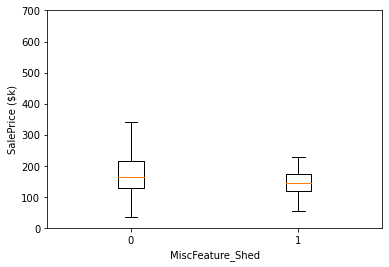

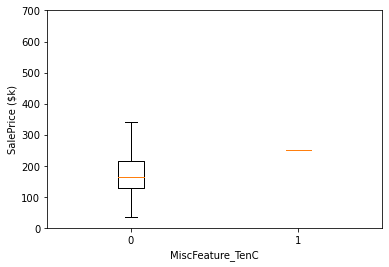

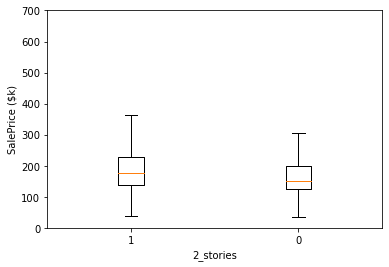

In [240]:
# make scatter plots of the features you think might be predictive of the sale price
for col in train.columns:
    if col not in ['Id', 'SalePrice']:
        if train[col].dtype == 'int64' or train[col].dtype == 'float64':
            plt.scatter(train[col], train['SalePrice'], alpha=0.2)
        
        else:
            # create box plots for categorical features
            plt.boxplot([train[train[col] == val]['SalePrice'] for val in train[col].unique()], showfliers=False)
            plt.xticks(range(1, len(train[col].unique()) + 1), train[col].unique())

        plt.yticks(range(0, 800000, 100000), range(0, 800, 100))
        
        plt.xlabel(col)
        plt.ylabel('SalePrice ($k)')
        plt.show()


In [132]:
from pprint import pprint
def print_missing_values(df):
    missing = {}
    for col in df.columns:
        missing_in_col = df[col].isnull().sum()
        if missing_in_col > 0:
            missing[col] = missing_in_col
    # order missing by value
    missing_sorted = sorted(missing.items(), key=lambda item: item[1], reverse=True)
    pprint(missing_sorted)

print(len(train))
print_missing_values(train)
print()
print(len(test))
print_missing_values(test)

1460
[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

1459
[('PoolQC', 1456),
 ('MiscFeature', 1408),
 ('Alley', 1352),
 ('Fence', 1169),
 ('FireplaceQu', 730),
 ('LotFrontage', 227),
 ('GarageYrBlt', 78),
 ('GarageFinish', 78),
 ('GarageQual', 78),
 ('GarageCond', 78),
 ('GarageType', 76),
 ('BsmtCond', 45),
 ('BsmtQual', 44),
 ('BsmtExposure', 44),
 ('BsmtFinType1', 42),
 ('BsmtFinType2', 42),
 ('MasVnrType', 16),
 ('MasVnrArea', 15),
 ('MSZoning', 4),
 ('Utilities', 2),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('Functional', 2),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('BsmtFinSF1', 1),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('To

In [38]:
cat_cols = ['MiscFeature', 'Fence', 
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
             'GarageFinish', 'GarageType', 'GarageYrBlt',
            'MasVnrArea', 'MasVnrType']

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [245]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [212]:
train['BedroomAbvGr']

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

In [246]:
def process_quality_vars(df):

    df['has_pool'] = df['PoolQC'].notnull().astype(int)
    df['has_garage'] = df['GarageQual'].notnull().astype(int)
    df['has_bsmt'] = df['BsmtQual'].notnull().astype(int)
    df['has_fence'] = df['Fence'].notnull().astype(int)
    df['Alley'] = df['Alley'].notnull().astype(int)

    # one hot encode misc features
    df = pd.get_dummies(df, columns=['MiscFeature'])
    
    df['2_stories'] = (df['2ndFlrSF'] > 0).astype(int)
    
    # fill missing values with 0 for list of columns

    qual_cols = ['PoolQC', 'HeatingQC', 'FireplaceQu','GarageQual',
                     'GarageCond','BsmtQual','BsmtCond', 'KitchenQual',
                     'ExterQual', 'ExterCond']
    
    cols_to_fill_0 = qual_cols + ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                  'CentralAir','GarageFinish', 'PavedDrive', 'Fence',
                                  'MasVnrType', 'MasVnrArea', 'GarageType', 'GarageYrBlt',
                                  'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2',
                                  'BsmtFinSF1', 'GarageArea','GarageCars','TotalBsmtSF']#,'BsmtUnfSF']
    

    df[cols_to_fill_0] = df[cols_to_fill_0].fillna(0)
    for col in qual_cols:
        df[col] = df[col].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df['BsmtExposure'] = df['BsmtExposure'].replace({'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

    df['BsmtFinType1'] = df['BsmtFinType1'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
    df['BsmtFinType2'] = df['BsmtFinType2'].replace({'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

    df['CentralAir'] = df['CentralAir'].replace({'N': 0, 'Y': 1})

    df['Functional'] = df['Functional'].fillna('Typ')
    df['Functional'] = df['Functional'].replace({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3,
                                                 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7})

    df['GarageFinish'] = df['GarageFinish'].replace({'Unf': 1, 'RFn': 2, 'Fin': 3})

    df['PavedDrive'] = df['PavedDrive'].replace({'N': 0, 'P': 1, 'Y': 2})

    df['Fence'] = df['Fence'].replace({'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

    # impute missing values for MSZoning with mode from neighborhood
    df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # impute electrical missing values with mode from neighborhood and zone
    df['Electrical'] = df.groupby(['Neighborhood', 'MSZoning'])['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))

    # impute missing values for lot frontage with median from neighborhood and zone
    df['LotFrontage'] = df.groupby('MSZoning')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # impute missing values for utilities with mode from neighbourhood and zone
    df['Utilities'] = df.groupby(['Neighborhood', 'MSZoning'])['Utilities'].transform(lambda x: x.fillna(x.mode()[0]))

    # impute missing values for exterior 1 and 2 with mode from neighbourhood and zone
    df['Exterior1st'] = df.groupby(['Neighborhood', 'MSZoning'])['Exterior1st'].transform(lambda x: x.fillna(x.mode()[0]))
    df['Exterior2nd'] = df.groupby(['Neighborhood', 'MSZoning'])['Exterior2nd'].transform(lambda x: x.fillna(x.mode()[0]))

    # same for sale type
    df['SaleType'] = df.groupby(['Neighborhood', 'MSZoning'])['SaleType'].transform(lambda x: x.fillna(x.mode()[0]))


    return df

In [247]:
train = process_quality_vars(train)
test = process_quality_vars(test)
print_missing_values(train)
print_missing_values(test)

[]
[]


In [252]:
print(train['SalePrice'].isnull().sum())

0


# Model Creation

In [248]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [253]:
classifiers = {'Linear Regression': LinearRegression(),
               'Logistic Regression': LogisticRegression(),
               'K Nearest Neighbors': KNeighborsClassifier()}

prediction_features = ['PoolQC', 'HeatingQC', 'FireplaceQu','GarageQual',
                       'GarageCond','BsmtQual','BsmtCond', 'KitchenQual',
                       'ExterQual', 'ExterCond', 'has_pool', 'has_garage', 'has_bsmt',
                       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

prediction_features = ['GrLivArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                       'BsmtQual', 'BsmtCond', 'KitchenQual', 'Functional', 'GarageCars']

benchmark_features = ['MoSold', 'YrSold', 'BedroomAbvGr', 'LotArea']

X_train, X_val, y_train, y_val = train_test_split(train[prediction_features], train['SalePrice'], test_size=0.2)

results = pd.DataFrame(columns=['Model', 'R2', 'RMSE', 'Train_RMSE'])
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    pred_val = clf.predict(X_val)
    # take logs of the sale prices
    y_val_log = np.log(y_val)
    pred_val_log = np.log(pred_val)
    mse = mean_squared_error(y_val_log, pred_val_log)
    r2 = r2_score(y_val_log, pred_val_log)
    rmse = np.sqrt(mse)
    
    train_pred = clf.predict(X_train)
    train_mse = mean_squared_error(np.log(y_train), np.log(train_pred))
    results = results.append({'Model': name, 'R2': r2, 'RMSE': rmse, 'Train_RMSE': np.sqrt(train_mse)}, ignore_index=True)

print(results)

C:\Users\benwi\AppData\Local\Temp\ipykernel_17684\3929772024.py:29: RuntimeWarning: invalid value encountered in log
  train_mse = mean_squared_error(np.log(y_train), np.log(train_pred))


ValueError: Input contains NaN.

In [242]:
# make submission
clf = LinearRegression()
clf.fit(train[prediction_features], train['SalePrice'])
pred_test = clf.predict(test[prediction_features])
test['SalePrice'] = pred_test
test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)


In [237]:
results = pd.DataFrame(columns=['Feature', 'R2', 'RMSE'])

for feature in benchmark_features:
    feat_train = np.array(X_train[feature]).reshape(-1, 1)
    feat_val = np.array(X_val[feature]).reshape(-1, 1)
    
    reg = LinearRegression()
    reg.fit(feat_train, y_train)
    pred_val = reg.predict(feat_val)
    y_val_log = np.log(y_val)
    pred_val_log = np.log(pred_val)
    r2 = r2_score(y_val_log, pred_val_log)
    mse = mean_squared_error(y_val_log, pred_val_log)
    rmse = np.sqrt(mse)

    results = results.append({'Feature': feature, 'R2': r2, 'RMSE': rmse}, ignore_index=True)

print(results)




        Feature        R2      RMSE
0        MoSold -0.074915  0.411462
1        YrSold -0.077975  0.412047
2  BedroomAbvGr -0.039772  0.404680
3       LotArea  0.007567  0.395361


C:\Users\benwi\AppData\Local\Temp\ipykernel_17684\303924845.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
C:\Users\benwi\AppData\Local\Temp\ipykernel_17684\303924845.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
C:\Users\benwi\AppData\Local\Temp\ipykernel_17684\303924845.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
C:\Users\benwi\AppData\Local\Temp\ipykernel_17684\303924845.py:16: FutureWarning: The frame.append method is deprecated and 